In [13]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_status_declare = pd.read_excel('content/Данные от экспертов.xlsx', sheet_name="Статус по простоям (июль 2024)", header=10)

In [3]:
df_status_declare = df_status_declare[1:]

In [4]:
time_filter = lambda x: x[:-3]
df_status_declare['Время начала интервала'] = df_status_declare['Время начала интервала'].apply(time_filter)
df_status_declare['Время окончания интервала'] = df_status_declare['Время окончания интервала'].apply(time_filter)

In [5]:
df_raw_data = pd.read_excel('content/Данные от экспертов.xlsx', sheet_name="Raw data (июль 2024)", header=9)

In [6]:
df_raw_data = df_raw_data[1:]
df_raw_data

,Unnamed: 0,Время начала интервала,Unnamed: 2,Время окончания интервала,Длительность,Линия,Оборудование,Unnamed: 7,Статус,Unnamed: 9,Заказ,Unnamed: 11,SKU
1,NaN,01/07/2024 08:00,NaN,01/07/2024 08:13,13.4,CL4,Блок розлива (CL4),NaN,Производство > 95%,NaN,NaN,NaN,NaN
2,NaN,01/07/2024 08:13,NaN,01/07/2024 08:13,0.183333,CL4,Блок розлива (CL4),NaN,Вмешательство оператора\n,NaN,NaN,NaN,NaN
3,NaN,01/07/2024 08:13,NaN,01/07/2024 08:18,4.433333,CL4,Блок розлива (CL4),NaN,Производство > 75% < 95%,NaN,NaN,NaN,NaN
4,NaN,01/07/2024 08:18,NaN,01/07/2024 09:17,59.1,CL4,Блок розлива (CL4),NaN,Производство > 95%,NaN,NaN,NaN,NaN
5,NaN,01/07/2024 09:17,NaN,01/07/2024 09:18,1.016666,CL4,Блок розлива (CL4),NaN,Внешняя ошибка,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6640,NaN,31/07/2024 00:18,NaN,31/07/2024 00:48,30.016666,CL4,Блок розлива (CL4),NaN,Производство > 95%,NaN,NaN,NaN,NaN
6641,NaN,31/07/2024 00:48,NaN,31/07/2024 00:50,2,CL4,Блок розлива (CL4),NaN,Производство > 75% < 95%,NaN,NaN,NaN,NaN
6642,NaN,31/07/2024 00:50,NaN,31/07/2024 01:21,31.516666,CL4,Блок розлива (CL4),NaN,Производство > 95%,NaN,NaN,NaN,NaN
6643,NaN,31/07/2024 01:21,NaN,31/07/2024 01:22,0.316666,CL4,Блок розлива (CL4),NaN,Производство > 75% < 95%,NaN,NaN,NaN,NaN


In [7]:
df_raw_data[df_raw_data['Время начала интервала'] == '01/07/2024 11:35']

,Unnamed: 0,Время начала интервала,Unnamed: 2,Время окончания интервала,Длительность,Линия,Оборудование,Unnamed: 7,Статус,Unnamed: 9,Заказ,Unnamed: 11,SKU
36,NaN,01/07/2024 11:35,NaN,01/07/2024 11:55,20.416666,CL4,Блок розлива (CL4),NaN,Вмешательство оператора\n,NaN,NaN,NaN,NaN


In [8]:
df_raw_data[df_raw_data['Время начала интервала'] == '01/07/2024 11:55']

,Unnamed: 0,Время начала интервала,Unnamed: 2,Время окончания интервала,Длительность,Линия,Оборудование,Unnamed: 7,Статус,Unnamed: 9,Заказ,Unnamed: 11,SKU
37,NaN,01/07/2024 11:55,NaN,01/07/2024 11:59,3.6,CL4,Блок розлива (CL4),NaN,Производство < 75%,NaN,NaN,NaN,NaN


In [9]:
_merged = df_status_declare.merge(df_raw_data, on='Время начала интервала')
_merged

,Линия_x,Unnamed: 1,Дата,Смена,Время начала интервала,Время окончания интервала_x,Длительность_x,Unnamed: 7_x,Плановая длительность,Unnamed: 9_x,...,Время окончания интервала_y,Длительность_y,Линия_y,Оборудование_y,Unnamed: 7_y,Статус,Unnamed: 9_y,Заказ,Unnamed: 11,SKU
0,CL4,NaN,01/07/2024,Дневная (08:00-20:00 ),01/07/2024 11:35,01/07/2024 11:55,20.416666,NaN,NaN,NaN,...,01/07/2024 11:55,20.416666,CL4,Блок розлива (CL4),NaN,Вмешательство оператора\n,NaN,NaN,NaN,NaN
1,CL4,NaN,01/07/2024,Дневная (08:00-20:00 ),01/07/2024 15:52,01/07/2024 16:14,21.7,NaN,NaN,NaN,...,01/07/2024 15:52,0.633333,CL4,Блок розлива (CL4),NaN,Производство < 75%,NaN,NaN,NaN,NaN
2,CL4,NaN,01/07/2024,Дневная (08:00-20:00 ),01/07/2024 15:52,01/07/2024 16:14,21.7,NaN,NaN,NaN,...,01/07/2024 16:14,21.7,CL4,Блок розлива (CL4),NaN,Вмешательство оператора\n,NaN,NaN,NaN,NaN
3,CL4,NaN,01/07/2024,Дневная (08:00-20:00 ),01/07/2024 17:52,01/07/2024 18:21,29.433333,NaN,NaN,NaN,...,01/07/2024 18:21,29.433333,CL4,Блок розлива (CL4),NaN,Затор на выходе,NaN,NaN,NaN,NaN
4,CL4,NaN,01/07/2024,Дневная (08:00-20:00 ),01/07/2024 18:22,01/07/2024 18:31,8.733333,NaN,NaN,NaN,...,01/07/2024 18:31,8.733333,CL4,Блок розлива (CL4),NaN,Затор на выходе,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,CL4,NaN,30/07/2024,Ночная (20:00-08:00 ),30/07/2024 21:05,30/07/2024 21:09,3.916666,NaN,NaN,NaN,...,30/07/2024 21:05,0.183333,CL4,Блок розлива (CL4),NaN,Производство > 75% < 95%,NaN,NaN,NaN,NaN
425,CL4,NaN,30/07/2024,Ночная (20:00-08:00 ),30/07/2024 21:05,30/07/2024 21:09,3.916666,NaN,NaN,NaN,...,30/07/2024 21:09,3.916666,CL4,Блок розлива (CL4),NaN,Внешняя ошибка,NaN,NaN,NaN,NaN
426,CL4,NaN,30/07/2024,Ночная (20:00-08:00 ),30/07/2024 21:42,31/07/2024 00:08,146.95,NaN,NaN,NaN,...,31/07/2024 00:08,146.95,CL4,Блок розлива (CL4),NaN,Нехватка на входе,NaN,NaN,NaN,NaN
427,CL4,NaN,30/07/2024,Ночная (20:00-08:00 ),31/07/2024 00:09,31/07/2024 00:11,2.35,NaN,NaN,NaN,...,31/07/2024 00:11,2.35,CL4,Блок розлива (CL4),NaN,Вмешательство оператора\n,NaN,NaN,NaN,NaN


In [10]:
_merged.to_excel('content/merged.xlsx')

# Разделение таблицы статусов новых данных

In [92]:
data = pd.read_excel('content/Поломки_Блок Розлива_2020-2024v2.xlsx')
data

,Начало простоя,Конец простоя,Reason 3 (ID),Reason 3 (ENG),Описание,Длительность
0,08-янв-20 02:04:44,08-янв-20 02:08:29,2010004.0,Breakdowns,Замена двух дросселей на наполнителе №17,3.750000
1,28-янв-20 09:11:45,28-янв-20 09:20:46,2010004.0,Breakdowns,Замена первого ролика на столике №1,9.016667
2,05-фев-20 10:40:01,05-фев-20 10:42:23,2010004.0,Breakdowns,Замена нагнетательного дросселя №89,2.366667
3,06-фев-20 10:59:58,06-фев-20 11:04:09,2010004.0,Breakdowns,Замена нагнетательного дросселя №105,4.183333
4,06-фев-20 19:02:48,06-фев-20 19:05:07,2010004.0,Breakdowns,Замена тормозной пластины №76,2.316667
...,...,...,...,...,...,...
527,04-ноя-24 19:15:34,04-ноя-24 19:17:41,2010004.0,Breakdowns,Замена тормозной пластины на 66 наполнителе,2.100000
528,05-ноя-24 09:48:48,05-ноя-24 09:51:31,2010004.0,Breakdowns,замена тормозной пластины,2.716667
529,21-ноя-24 03:12:49,21-ноя-24 03:16:28,2010004.0,Breakdowns,МЕХ. Недолив. Пустые банки. 20/32/33/39,3.650000
530,21-ноя-24 03:24:45,21-ноя-24 03:28:36,2010004.0,Breakdowns,МЕХ. Недолив. Пустые банки. 20/32/33/39,3.833333


In [93]:
pattern = r'(?:Замена|устранение|не\s+работает|выбивает|залип|остановки|ремонт|заменена|замена|мех\.|кип)(.*?)(?:№|\b№№\b|#|:\s|на\s|по\s)(\d+(?:,\s*\d+)*)'

# Функция для парсинга строки
def parse_description(description):
	try:
		match = re.search(pattern, description, re.IGNORECASE)
		if match:
			element = match.group(1).strip()
			numbers = match.group(2).replace('№', '').replace('#', '').strip() 
			return element.lower(), numbers
		return None, None
	except TypeError:
		return None, None

data[["Элемент", "Номер"]] = data["Описание"].apply(lambda x: pd.Series(parse_description(x)))

# Разделяем номера, если их несколько
data = data.dropna(subset=["Номер"])  # Удаляем строки без найденных номеров
# data["Номер"] = data["Номер"].str.split(',').explode().str.strip()

# Выводим результат
print(data[["Элемент", "Номер"]])

# Сохраняем в CSV файл (если нужно)
data[["Элемент", "Номер"]].to_csv("parsed_data.csv", index=False, encoding="utf-8")

                           Элемент Номер
0    двух дросселей на наполнителе    17
1        первого ролика на столике     1
2         нагнетательного дросселя    89
3         нагнетательного дросселя   105
4               тормозной пластины    76
..                             ...   ...
504                       недолива    71
517                  тор. пластины    63
518                       дросселя    33
526             тормозной пластины    10
527             тормозной пластины    66

[243 rows x 2 columns]


In [94]:
data.drop('Описание', axis=1, inplace=True)

/tmp/ipykernel_114447/2089630613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('Описание', axis=1, inplace=True)


In [95]:
len(data['Элемент'].unique())

74

In [96]:
# Проведём анализ того, насколько долго при каждом элементе происходил простой

sorted_data = data.sort_values(by='Длительность', ascending=False)

<Axes: xlabel='Длительность', ylabel='Элемент'>

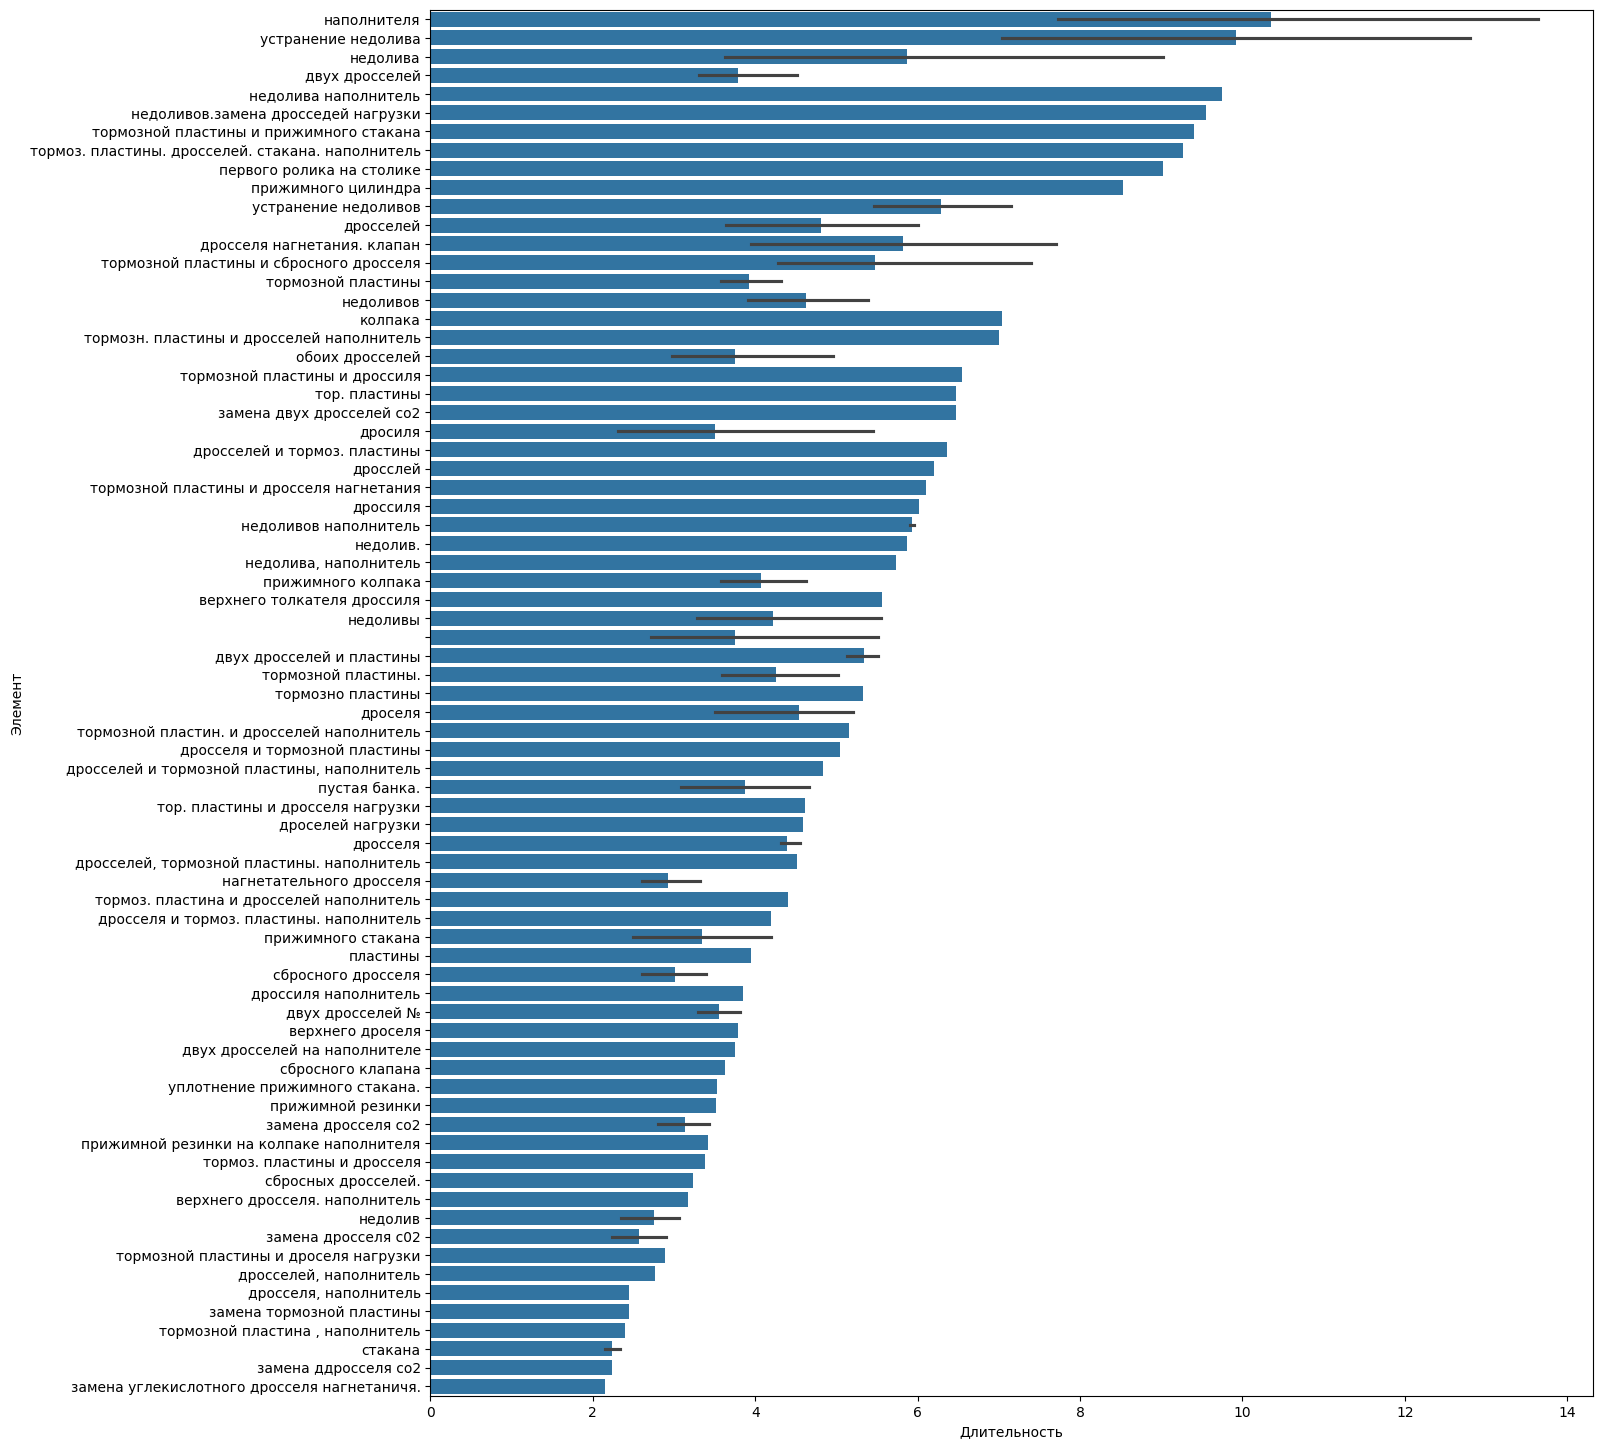

In [97]:
plt.figure(figsize=(15,18))
sns.barplot(x='Длительность', y='Элемент', data=sorted_data)


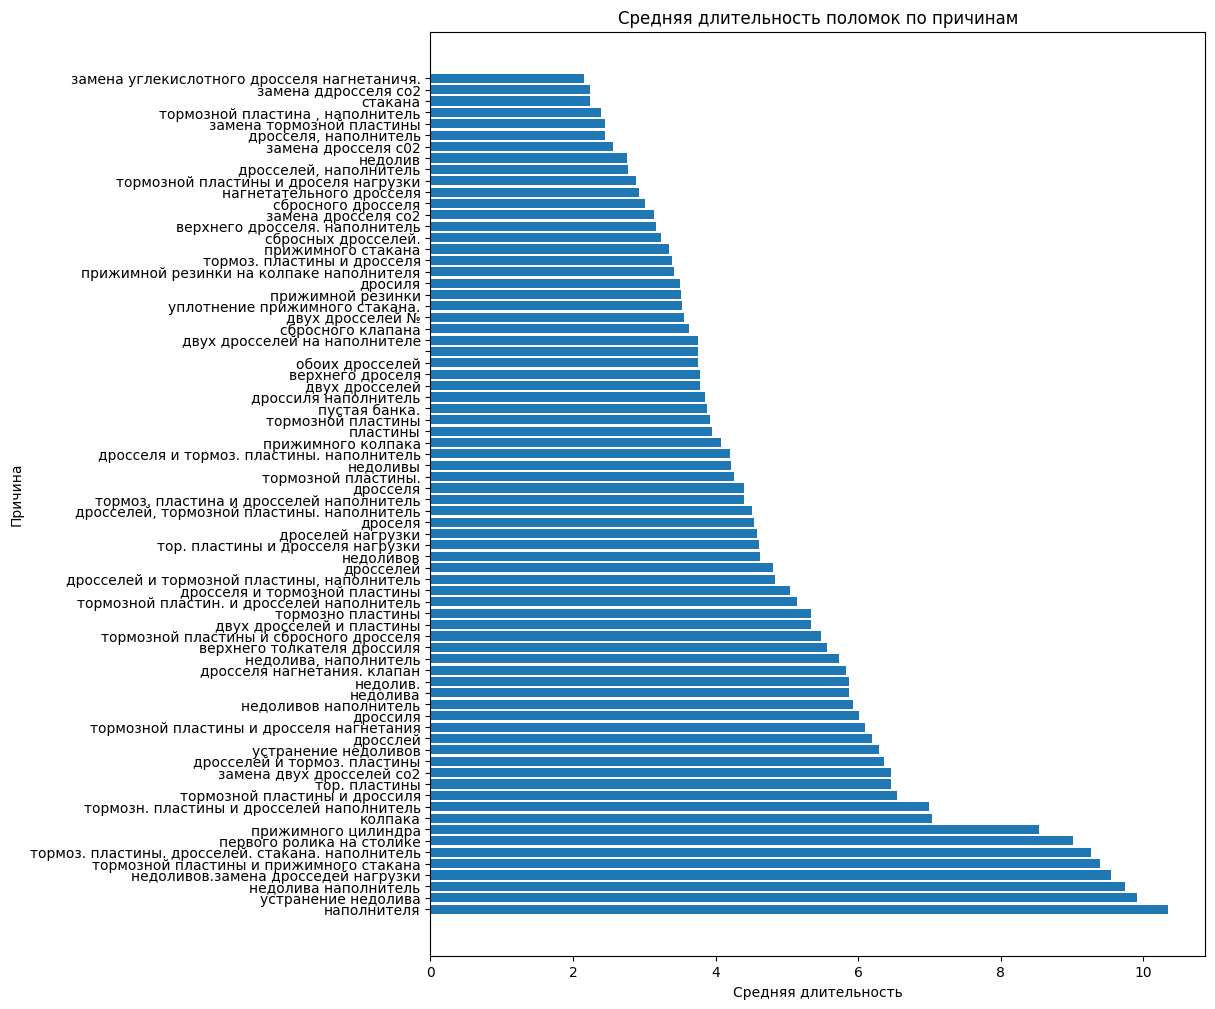

Топ-10 причин по средней длительности:
                                              Элемент  Длительность
32                                        наполнителя     10.355556
72                                устранение недолива      9.916667
36                               недолива наполнитель      9.750000
40                недоливов.замена дросседей нагрузки      9.550000
68            тормозной пластины и прижимного стакана      9.400000
59  тормоз. пластины. дросселей. стакана. наполнитель      9.266667
43                          первого ролика на столике      9.016667
47                                прижимного цилиндра      8.533333
30                                            колпака      7.033333
60          тормозн. пластины и дросселей наполнитель      7.000000


In [98]:
grouped = data.groupby('Элемент')['Длительность'].mean().reset_index()

# Сортировка по средней длительности
sorted_grouped = grouped.sort_values(by='Длительность', ascending=False)

# Визуализация
plt.figure(figsize=(10, 12))
plt.barh(sorted_grouped['Элемент'], sorted_grouped['Длительность'])
plt.xlabel('Средняя длительность')
plt.ylabel('Причина')
plt.title('Средняя длительность поломок по причинам')
plt.show()

# Топ-10 причин по средней длительности
top_10 = sorted_grouped.head(10)
print("Топ-10 причин по средней длительности:")
print(top_10)

In [99]:
# выполним кластеризацию данных по длительности
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data[['Длительность']])
data['cluster'] = kmeans.predict(data[['Длительность']])
data

/tmp/ipykernel_114447/3569028396.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = kmeans.predict(data[['Длительность']])


,Начало простоя,Конец простоя,Reason 3 (ID),Reason 3 (ENG),Длительность,Элемент,Номер,cluster
0,08-янв-20 02:04:44,08-янв-20 02:08:29,2010004.0,Breakdowns,3.750000,двух дросселей на наполнителе,17,1
1,28-янв-20 09:11:45,28-янв-20 09:20:46,2010004.0,Breakdowns,9.016667,первого ролика на столике,1,2
2,05-фев-20 10:40:01,05-фев-20 10:42:23,2010004.0,Breakdowns,2.366667,нагнетательного дросселя,89,1
3,06-фев-20 10:59:58,06-фев-20 11:04:09,2010004.0,Breakdowns,4.183333,нагнетательного дросселя,105,1
4,06-фев-20 19:02:48,06-фев-20 19:05:07,2010004.0,Breakdowns,2.316667,тормозной пластины,76,1
...,...,...,...,...,...,...,...,...
504,08-фев-24 00:56:06,08-фев-24 01:01:53,2010004.0,Breakdowns,5.766667,недолива,71,0
517,19-сен-24 00:21:31,19-сен-24 00:28:00,2010004.0,Breakdowns,6.466667,тор. пластины,63,0
518,19-сен-24 00:30:19,19-сен-24 00:34:53,2010004.0,Breakdowns,4.550000,дросселя,33,0
526,04-ноя-24 16:04:20,04-ноя-24 16:07:21,2010004.0,Breakdowns,3.016667,тормозной пластины,10,1


In [ ]:
data.to_excel('content/clusterized.xlsx')

In [ ]:
labels = kmeans.labels_
centers = kmeans.cluster_centers_

IndexError: index 1 is out of bounds for axis 1 with size 1

<Figure size 800x600 with 0 Axes>

In [77]:
labels

array([1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 2, 0, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 2, 1, 0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1,
       1], dtype=int32)

In [85]:
data = data.sort_values(by='Длительность', ascending=False)

/tmp/ipykernel_114447/2138219320.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=color, label=f'Кластер {cluster}')


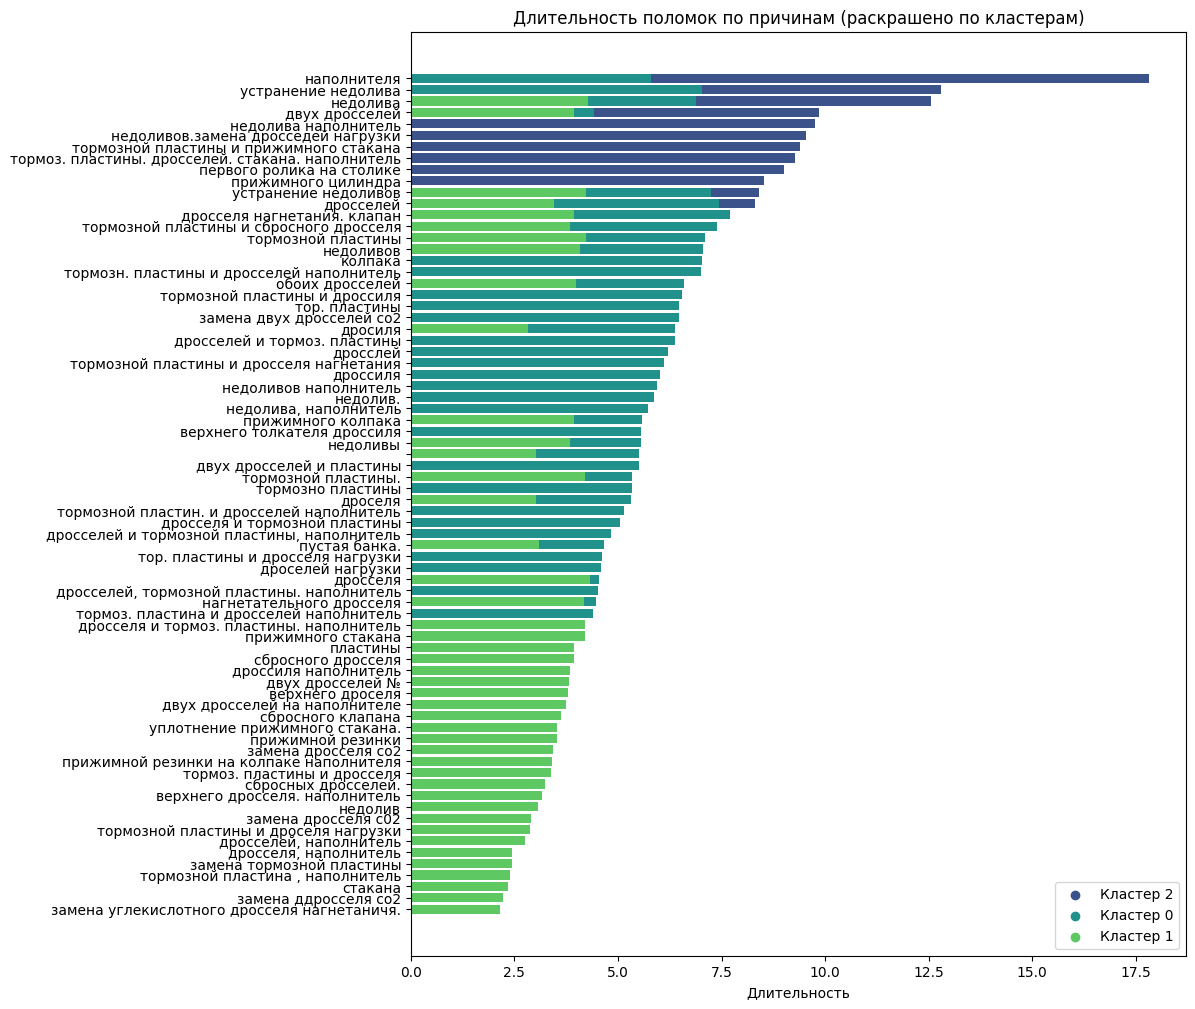

In [86]:
colors = sns.color_palette('viridis', n_colors=len(data['cluster'].unique()))

color_dict = {cluster: colors[i] for i, cluster in enumerate(data['cluster'].unique())}

bar_colors = [color_dict[cluster] for cluster in data['cluster']]

plt.figure(figsize=(10, 12))
plt.barh(data['Элемент'], data['Длительность'], color=bar_colors)
plt.xlabel('Длительность')
plt.title('Длительность поломок по причинам (раскрашено по кластерам)')
plt.gca().invert_yaxis()  

for cluster, color in color_dict.items():
    plt.scatter([], [], c=color, label=f'Кластер {cluster}')
plt.legend()

plt.show()

In [84]:
data.groupby('cluster')['Длительность'].mean()

cluster
0     5.602675
1     3.181621
2    10.234375
Name: Длительность, dtype: float64

# Текстовый анализ

In [ ]:
df = pd.read_excel('/content/Данные от экспертов.xlsx')

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
352,4.383333,NaN,Санитарные регламенты,Внешние мойки,Ополаскивание укупора и розлива
353,3.916666,NaN,Организационные,Проверки по качеству,Лабораторные проверки
354,146.95,NaN,Переналадки,Переход через щ. СИП,Продукт СИП щ. продукт
355,2.35,NaN,Переналадки,Переход через щ. СИП,Продукт СИП щ. продукт


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('/content/beer_features.xlsx', header=3).dropna(axis=1, how='all')
main_features = pd.read_excel('/content/beer_features_main.xlsx', header=3).dropna(axis=1, how='all')

In [ ]:
main_features['Статус'] =  main_features['Статус'].astype('category').cat.codes

In [ ]:
from datetime import datetime

main_features['Время начала интервала'] = main_features['Время начала интервала'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y %H:%M'))
main_features['День недели'] = main_features['Время начала интервала'].dt.weekday

In [ ]:
def categorize_time(hour):
    if 5 <= hour < 12:
        return 0
    elif 12 <= hour < 17:
        return 1
    elif 17 <= hour < 22:
        return 2
    else:
        return 3

# Apply the function to create a new column with time categories
main_features['Время дня'] = main_features['Время начала интервала'].apply(lambda x: x.hour).apply(categorize_time)

In [ ]:
df

,Линия,Дата,Смена,Время начала интервала,Время окончания интервала,Длительность,Простои,Причина,Общее описание,код причины,Детальное описание,Оборудование (ID в Монолите),Оборудование,Компонент,№ тех заявки (PMN заявки),Симптом,Код причины,Комментарий PMN,Статус тех заявки (PNM)
0,CL4,01/07/2024,Дневная (08:00-20:00 ),01/07/2024 11:35:08,01/07/2024 11:55:33,20.416666,Переналадки,Переход продукт вода продукт,Переход продукт вода продукт + АПМ,2214102,переход,1000132103,Блок розлива,Розлив,50211857,Симптом,1.000132e+09,переход,sent
1,CL4,01/07/2024,Дневная (08:00-20:00 ),01/07/2024 15:52:59,01/07/2024 16:14:41,21.700000,Переналадки,Переход продукт вода продукт,Переход продукт вода продукт + АПМ,2214102,переход,1000132103,Блок розлива,Розлив,50211878,Симптом,1.000132e+09,переход,sent
2,CL4,01/07/2024,Дневная (08:00-20:00 ),01/07/2024 17:52:22,01/07/2024 18:21:48,29.433333,Прочие внеплановые простои,Загруженность склада,Съем ГП,2112001,нет сьема,1000132103,Блок розлива,Розлив,50211893,Симптом,1.000132e+09,нет сьема,sent
3,CL4,01/07/2024,Дневная (08:00-20:00 ),01/07/2024 18:22:22,01/07/2024 18:31:06,8.733333,Прочие внеплановые простои,Загруженность склада,Съем ГП,2112001,нет сьема,1000132103,Блок розлива,Розлив,NaN,NaN,NaN,NaN,NaN
4,CL4,01/07/2024,Дневная (08:00-20:00 ),01/07/2024 18:51:42,01/07/2024 18:54:03,2.350000,Прочие внеплановые простои,Загруженность склада,Съем ГП,2112001,нет сьема,1000132103,Блок розлива,Розлив,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,CL4,30/07/2024,Дневная (08:00-20:00 ),30/07/2024 19:11:29,30/07/2024 19:15:52,4.383333,Санитарные регламенты,Внешние мойки,Ополаскивание укупора и розлива,2310502,Обл.гор. водой,1000132103,Блок розлива,Автомат укупорочный,NaN,NaN,NaN,NaN,NaN
342,CL4,30/07/2024,Ночная (20:00-08:00 ),30/07/2024 21:05:44,30/07/2024 21:09:39,3.916666,Организационные,Проверки по качеству,Лабораторные проверки,2512701,Отбор проб.,1000132103,Блок розлива,Розлив,50214882,Симптом,1.000132e+09,Отбор проб.,sent
343,CL4,30/07/2024,Ночная (20:00-08:00 ),30/07/2024 21:42:00,31/07/2024 00:08:57,146.950000,Переналадки,Переход через щ. СИП,Продукт СИП щ. продукт,2214201,Переход на FLash. СИП. АПМ.,1000132103,Блок розлива,Розлив,50214887,Симптом,1.000132e+09,Переход на FLash. СИП. АПМ.,sent
344,CL4,30/07/2024,Ночная (20:00-08:00 ),31/07/2024 00:09:34,31/07/2024 00:11:55,2.350000,Переналадки,Переход через щ. СИП,Продукт СИП щ. продукт,2214201,Переход на FLash. СИП. АПМ.,1000132103,Блок розлива,Розлив,NaN,NaN,NaN,NaN,NaN


In [ ]:
main_features

,Время начала интервала,Время окончания интервала,Длительность,Линия,Оборудование,Статус,День недели,Время дня
0,2024-07-01 08:00:00,01/07/2024 08:13,13.400000,CL4,Блок розлива (CL4),10,0,0
1,2024-07-01 08:13:00,01/07/2024 08:13,0.183333,CL4,Блок розлива (CL4),1,0,0
2,2024-07-01 08:13:00,01/07/2024 08:18,4.433333,CL4,Блок розлива (CL4),9,0,0
3,2024-07-01 08:18:00,01/07/2024 09:17,59.100000,CL4,Блок розлива (CL4),10,0,0
4,2024-07-01 09:17:00,01/07/2024 09:18,1.016666,CL4,Блок розлива (CL4),2,0,0
...,...,...,...,...,...,...,...,...
6639,2024-07-31 00:18:00,31/07/2024 00:48,30.016666,CL4,Блок розлива (CL4),10,2,3
6640,2024-07-31 00:48:00,31/07/2024 00:50,2.000000,CL4,Блок розлива (CL4),9,2,3
6641,2024-07-31 00:50:00,31/07/2024 01:21,31.516666,CL4,Блок розлива (CL4),10,2,3
6642,2024-07-31 01:21:00,31/07/2024 01:22,0.316666,CL4,Блок розлива (CL4),9,2,3


In [ ]:
sum(df['Длительность']) / sum(main_features['Длительность'])

0.28704206373781055

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(main_features[['Длительность', 'День недели', 'Время дня']], main_features['Статус'], test_size=0.2, random_state=42)

In [ ]:
# !pip install catboost
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=False) # Suppress verbose output

# Fit model
model.fit(X_train, y_train, cat_features=['День недели', 'Время дня'])

# Get predictions
preds = model.predict(X_test).flatten()
print(preds)

[ 9 10  8 ... 10  8  9]


In [ ]:
from sklearn.metrics import f1_score
#не кодируя 'День недели', 'Время дня' как категориальные признаки
print(f1_score(y_test, preds, average='macro'))
print(f1_score(y_test, preds, average='micro'))

0.20296031988219954
0.5003762227238525


In [ ]:
#кодируя 'День недели', 'Время дня' как категориальные признаки
print(f1_score(y_test, preds, average='macro'))
print(f1_score(y_test, preds, average='micro'))

0.18501793272690212
0.5116629044394282


In [ ]:
prostoi = pd.get_dummies(df['Простои'])
prichina = pd.get_dummies(df['Причина'])
obshee_opisanie = pd.get_dummies(df['Общее описание'])
component = pd.get_dummies(df['Компонент'])
# print(len(df['Простои'].unique()))
# print(len(df['Причина'].unique()))
# print(len(df['Общее описание'].unique()))
# print(len(df['Детальное описание'].unique()))
# print(len(df['Компонент'].unique()))


146
3


In [ ]:
obshee_opisanie

,АПМ (Пенная санитарная обработка),Дезинфекция,Изм-е дизайна (цвета/печати/акциз),Лабораторные проверки,Малые остановки,Ополаскивание укупора и розлива,Отсутствие заявок,ПТО,Переход продукт вода продукт,Переход продукт вода продукт + АПМ,...,Прогон в 00:00 часов,Продукт СИП щ-к продукт,Продукт СИП щ. продукт,Продукт стерил. продукт,Смена дизайна (экспорт/промо),Смена расходных материалов,Съем ГП,"Та же машина, разное кол-во рядов, разное кол-во шт.",Тесты материалов,Услуги подрядных организаций
0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
342,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
343,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
344,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
